# Etape 1 :Extraction de mots-clés relatifs à l'année 1961.

## Imports

In [22]:
import os
import yake

## Extraction des mots-clés

In [23]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Filtrer les Fichiers
data_path = "../../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt') and '1961' in f]

#Extraire les fichiers de l'année 1961 en en ne gardant que les bigrammes
for f in sorted(files): 
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []  
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1961-01-05_01-00016.txt mentions these keywords: Marco Sachim, Filippa Martinez, dit Marco, Sachim eut, DERNIERE EDITION, EDITION PARUE, Opel Rek, som JEUDI, CHAUFFEUR VOITURES, VOITURE NEUVE, VOITURES NEUVES, VOITURE MEME...
KB_JB838_1961-01-14_01-00013.txt mentions these keywords: fil PRO, THEATRE NATIONAL, THEATRE FLAMAND, Cirque Royal, janvier MONNAIE, cirque Busch, Ancienne Belgique, JACQUES DEVAL, THEATRE ROYAL, THEATRE MOLIERE, MONNAIE TRM, MOLIERE Dimanche, Centre culturel...
KB_JB838_1961-01-18_01-00023.txt mentions these keywords: uSn l'Un, fia Asldsit, Volant Logique, Opel VOITURES, FIAT Mùttipla, Coupé Lutte, Austin Healey, Coupé MERCEDES...
KB_JB838_1961-01-19_01-00006.txt mentions these keywords: Ford Taunus, politique allemande, affaire Pasternak, grand poète, Affaires économiques, vie politique, Communauté politique, Marché commun, mercredi matin, ministre Van...
KB_JB838_1961-01-22_01-00006.txt mentions these keywords: Notes belges, ACTUALITÉS ÉCONOMIQUES, SOI

# Etape 2 : Storwords et génération de nuage de mots

## Imports

In [24]:
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fatig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stopwords

In [25]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "etc", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "autre", "jusqu", "rue", "rossel", "ans", "tél", "bruxelles", "dem", "janvier", "février",
       "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre",
       "décembre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", 
       "sept", "déjà", "ecr", "prix", "app","bon", "com", "puis", "part", "mois", "bonne", 
       "très", "van", "trois", "rez", "ils", "elles", "il", "elle", "vers", "trop", "tel", "bel",
       "plusieurs", "mod", "écrire", "ecrire", "brux", "peu", "toujours", "alors", "trav",
        ]
sw = set(sw)


## Création d'un fichier pour l'année 1961

In [26]:
# Choisir une année
year = 1961

# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f] 

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()


## Nettoyage du fichier

In [27]:
#création de la fonction nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw] #2 caractères et plus petits = parasites
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

#application sur l'ensemble du fichier
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOM PAGES SOIR QUELLE HEURE LAQUELLE ACHETEZ SOIR RÉCLAMEZ VENDEUR DERNIERE EDITION PARUE DSTOS ÉDITIONS PNIÎITMR DTUXLÈM TROL LIM QUATRIÈME RDLUON NUIT DCM MIT NUIT MATIN WEEK END SPORTIF HORN FALÀKVU FOOTBALL VUV CKSL BELLE VAUXHALL CONT TECH SOIR ISARD CHAMPION AUR KTALSIÉ PTES CONT TECHN FCRÇUNPT TLMBR COMPRIT SUÈDE MLDL DAUPHINE ABARTH CRÉ LUXE OPEL KAPITAN CRÉD CORBEAU ANRLLA CRÈME PROP KMS CRÉD POSA REINE PORSCHE DECAPOTABLE GEORG MERCURY INTER PTES NOM ACCÈS NEUVE MAIL OPEL ITEKORD CRÉD '

## Nuage de mots 

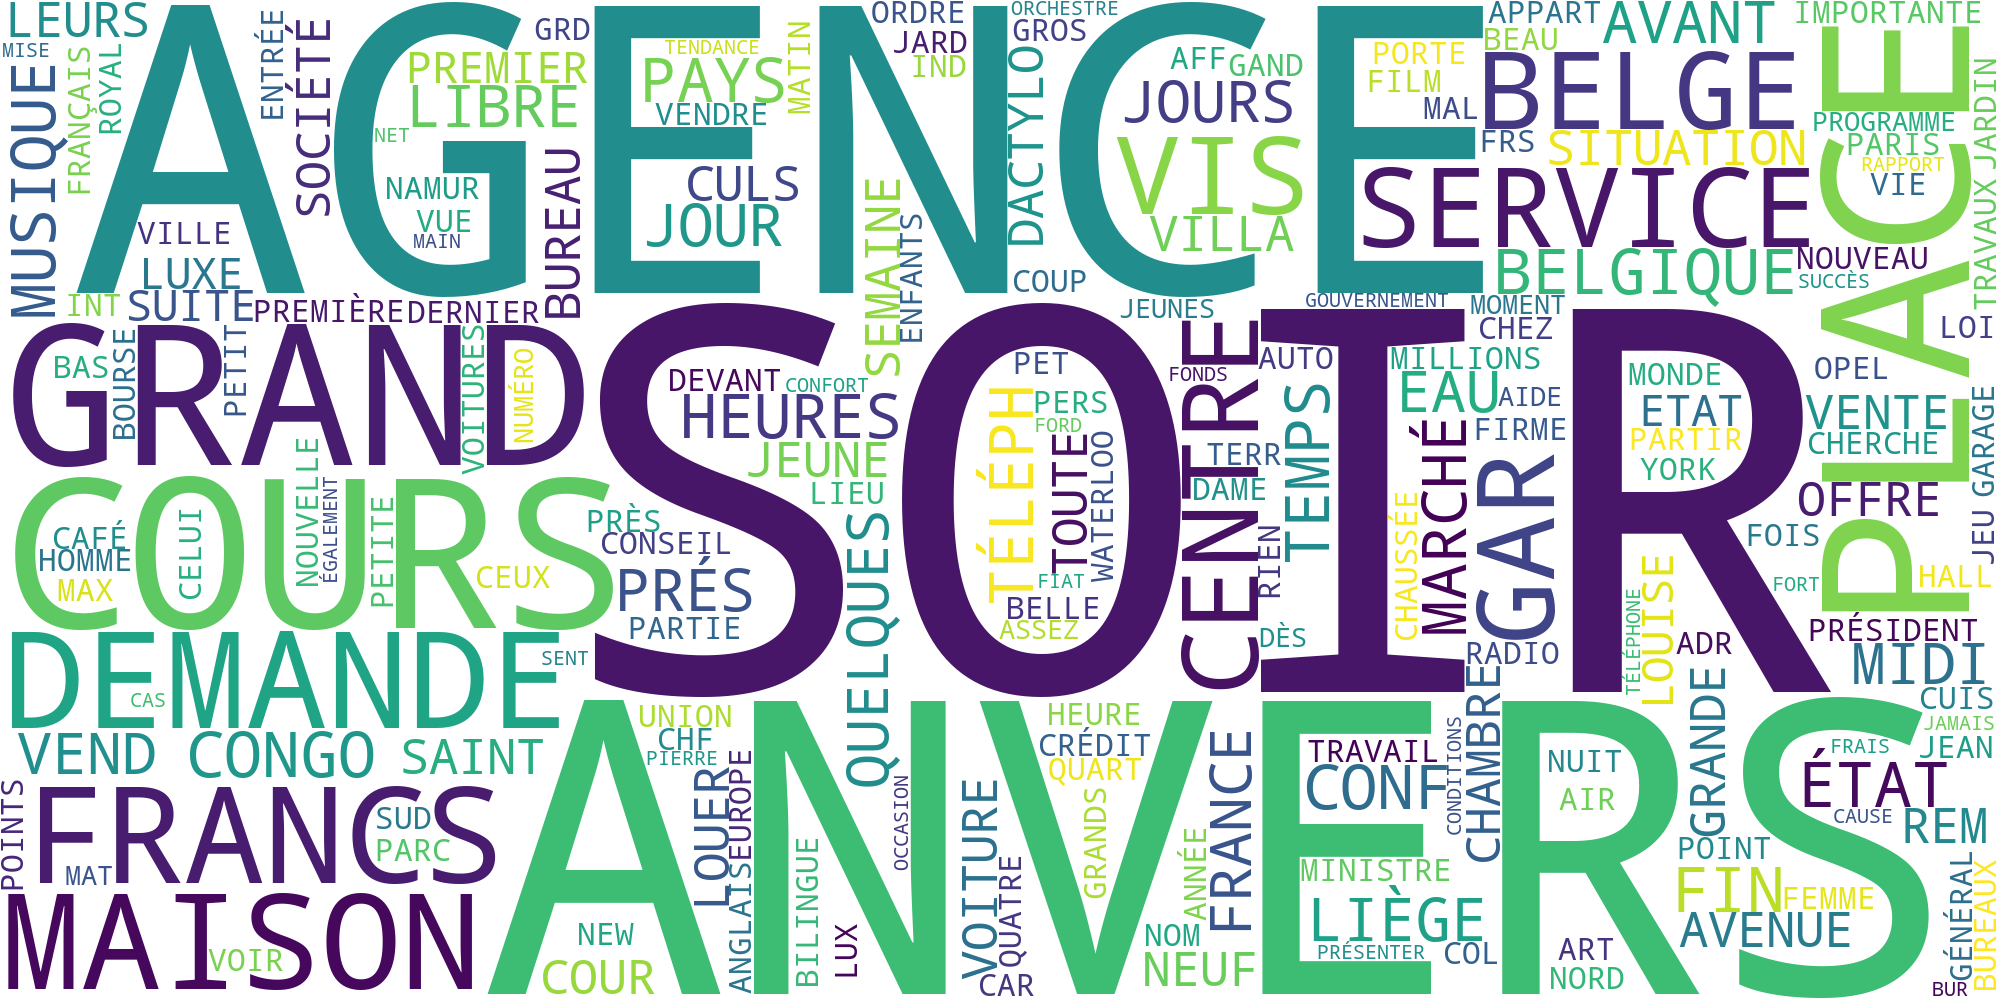

In [28]:
frequencies = Counter(after.split())
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Etape 3 : Trouver les entités principales pour l'année 1961

## Imports

In [29]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!pip install  fr_core_news_md


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
nlp = spacy.load('fr_core_news_md')

## Reconnaissance d'entités

In [31]:
# Charger le texte juste pour l'année 1961
year = 1961
n = 1000000
text = open("../../data/tmp/1961_clean.txt", encoding='utf-8').read()[:n]

# Traiter le texte
doc = nlp(text)

# Trier et imprimer les entités les plus fréquentes et leur type
entities = defaultdict(int)

for ent in doc.ents:
    if (ent.label_ == "PER" or ent.label_ == "ORG" or ent.label_ == "LOC") and len(ent.text) > 3:
        entities[f"{ent.text}({ent.label_})"] += 1 
sorted_entities = sorted(entities.items(), key=lambda kv: kv[1], reverse=True)
for ent, freq in sorted_entities:
    if freq >=5:
        print(f"{ent} apparait {freq} fois")


AGENCE(ORG) apparait 65 fois
OPEL(ORG) apparait 52 fois
FIRME(ORG) apparait 46 fois
CONGO(LOC) apparait 27 fois
EEAGROSSEL(ORG) apparait 18 fois
VOUA(ORG) apparait 13 fois
DÉSIRE(ORG) apparait 12 fois
LOUISE(ORG) apparait 11 fois
FIAT(ORG) apparait 11 fois
EFFORTS(ORG) apparait 11 fois
WAVRE(ORG) apparait 11 fois
ROUTE(ORG) apparait 11 fois
CRÉD(ORG) apparait 10 fois
PEUGEOT(ORG) apparait 10 fois
RENS(ORG) apparait 10 fois
VOLKSWAGEN(ORG) apparait 10 fois
BELG(ORG) apparait 10 fois
GAND(ORG) apparait 9 fois
AUTOMOBILE(ORG) apparait 9 fois
PRÊTENT(ORG) apparait 9 fois
ANDERLECHT(ORG) apparait 9 fois
TOUTE(ORG) apparait 9 fois
ENTRET(ORG) apparait 9 fois
PARC(ORG) apparait 8 fois
ACOMPTE(ORG) apparait 8 fois
SOVIÉTIQUES(ORG) apparait 7 fois
ENVLR(ORG) apparait 7 fois
EISDEN(ORG) apparait 7 fois
TOISON(ORG) apparait 6 fois
AUSSITÔT(ORG) apparait 6 fois
EMPLOYEE(ORG) apparait 6 fois
CAPITAINES(ORG) apparait 6 fois
ORCHESTRE(ORG) apparait 6 fois
ROYAL(ORG) apparait 6 fois
MALIN(ORG) apparai

# Etape 4 : Analyse des sentiments de phrases choisies aléatoirement

## Imports

In [32]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

%pip install tensorflow
%pip install sentencepiece
%pip install transformers
%pip install tf_keras

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Fatig\tac\tac_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# Chargement du modèle pour les transformers
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_pt=False)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

sentiment_analyser = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Device set to use 0


In [34]:
# Création de la fonction get_sentiment pour textblob

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"Ce texte est {polarity_str} et {subjectivity_str}.")

## Analyse des sentiments de 10 phrases

In [35]:
#Ligne 1
get_sentiment("Quelle que soit l'heure à laquelle vous achetez LE SOIR, réclamez au vendeur LA DERNIERE EDITION PARUE") 
sentiment_analyser("Quelle que soit l'heure à laquelle vous achetez LE SOIR, réclamez au vendeur LA DERNIERE EDITION PARUE")

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Ce texte est 29% negative et 20% subjective.


[{'label': 'NEGATIVE', 'score': 0.5119879841804504}]

In [36]:
#Ligne 5
get_sentiment("Il est courant de dire que per- *onne ne peut comprendre la politique d’aucun pays, sauf le sien.") 
sentiment_analyser("Il est courant de dire que per- *onne ne peut comprendre la politique d’aucun pays, sauf le sien.")

Ce texte est 5% positive et 10% subjective.


[{'label': 'NEGATIVE', 'score': 0.5675150156021118}]

In [37]:
#Ligne 11
get_sentiment("Trois fois par jour une cuillerée de cet excellent remède et la toux est bannie de ma maison") 
sentiment_analyser("Trois fois par jour une cuillerée de cet excellent remède et la toux est bannie de ma maison")

Ce texte est 50% positive et 90% subjective.


[{'label': 'POSITIVE', 'score': 0.7736607193946838}]

In [38]:
#Ligne 14
get_sentiment("Les VENTES CHOCS de CADO RADIO sont appréciées de tous.") 
sentiment_analyser("Les VENTES CHOCS de CADO RADIO sont appréciées de tous.")

Ce texte est 22% positive et 10% subjective.


[{'label': 'POSITIVE', 'score': 0.686033308506012}]

In [39]:
#Ligne 20
get_sentiment("SACHEZ, PÈRE BRICOLE, QUE JE N'APPRÉCIË PAS DU tOUT VOS MÉTHODES DE CHASSE") 
sentiment_analyser("SACHEZ, PÈRE BRICOLE, QUE JE N'APPRÉCIË PAS DU tOUT VOS MÉTHODES DE CHASSE")

Ce texte est 22% positive et 10% subjective.


[{'label': 'NEGATIVE', 'score': 0.7953444123268127}]

In [40]:
#Ligne 27
get_sentiment("Regardez-nous... et reconnaissez que nous sommes bien élégantes, toutes les trois") 
sentiment_analyser("Regardez-nous... et reconnaissez que nous sommes bien élégantes, toutes les trois")

Ce texte est 31% positive et 33% subjective.


[{'label': 'POSITIVE', 'score': 0.7050172090530396}]

In [41]:
#Ligne 38, enlèvement des guillements pour "accueillants"
get_sentiment("L’Autriche vous comblera : elle a le sourire ensoleillé, des prix vraiment accueillants  et tout • absolument toutl * pour vous plaire." ) 
sentiment_analyser("L’Autriche vous comblera : elle a le sourire ensoleillé, des prix vraiment accueillants  et tout • absolument toutl * pour vous plaire." )

Ce texte est 39% positive et 46% subjective.


[{'label': 'POSITIVE', 'score': 0.9221219420433044}]

In [42]:
#Ligne 45
get_sentiment("S’il ne l’obtint pas, c’est que le jury cannois, toujours soucieux. dè contenter le plus de monde possible et de ne froisser personne, estima prudent dè rie pas mettre trop en évidence uné œuvre qui, fatalement, aux yeux de la majorité des croyants, était blasphématoire et sacrilège.") 
sentiment_analyser("S’il ne l’obtint pas, c’est que le jury cannois, toujours soucieux. dè contenter le plus de monde possible et de ne froisser personne, estima prudent dè rie pas mettre trop en évidence uné œuvre qui, fatalement, aux yeux de la majorité des croyants, était blasphématoire et sacrilège.")

Ce texte est 9% negative et 35% subjective.


[{'label': 'NEGATIVE', 'score': 0.9283687472343445}]

In [43]:
#Ligne 54
get_sentiment("Essayez-le aujourd'hui encore, mais insistez auprès de votre détaillant : c'est un film-couleurs GEVACOLOR, de Gevaert, qu'il vous faut.") 
sentiment_analyser("Essayez-le aujourd'hui encore, mais insistez auprès de votre détaillant : c'est un film-couleurs GEVACOLOR, de Gevaert, qu'il vous faut.")

Ce texte est 75% negative et 100% subjective.


[{'label': 'POSITIVE', 'score': 0.7411310076713562}]

In [44]:
#Ligne 64
get_sentiment("Sous la fracassante, sous la sauvage beauté de Sophia se cachaient une personnalité, une passion qui, un jour ou l’autre, devaient éclater.") 
sentiment_analyser("Sous la fracassante, sous la sauvage beauté de Sophia se cachaient une personnalité, une passion qui, un jour ou l’autre, devaient éclater.")

Ce texte est 1% negative et 5% subjective.


[{'label': 'POSITIVE', 'score': 0.9858168363571167}]